In [21]:
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error

In [22]:
f=pd.read_csv('yapay_zeka_egitim seti.csv')
staatistik=f.describe()
print(staatistik)

              qty   total_price  freight_price  unit_price  \
count  676.000000    676.000000     676.000000  676.000000   
mean    14.495562   1422.708728      20.682270  106.496800   
std     15.443421   1700.123100      10.081817   76.182972   
min      1.000000     19.900000       0.000000   19.900000   
25%      4.000000    333.700000      14.761912   53.900000   
50%     10.000000    807.890000      17.518472   89.900000   
75%     18.000000   1887.322500      22.713558  129.990000   
max    122.000000  12095.000000      79.760000  364.000000   

       product_name_lenght  product_description_lenght  product_photos_qty  \
count           676.000000                  676.000000          676.000000   
mean             48.720414                  767.399408            1.994083   
std               9.420715                  655.205015            1.420473   
min              29.000000                  100.000000            1.000000   
25%              40.000000                  339.000

In [23]:
bosVeri=f.isnull().sum()
print(bosVeri)

product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

f = pd.read_csv('Testdatensatz.csv')

print(f.info())
print(f.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [25]:
from sklearn.preprocessing import LabelEncoder
df=pd.read_csv('Testdatensatz.csv')
featurelar=['product_id', 'month_year', 'qty', 'total_price']
X=df.drop(columns=featurelar)
y=df['qty']
label_encoder=LabelEncoder()
if 'product_category_name' in X.columns:
    X['product_category_name'] = label_encoder.fit_transform(X['product_category_name'])
X_egitim, X_test, y_egitim, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rfModel=RandomForestRegressor(n_estimators=10, random_state=42)
rfModel.fit(X_egitim, y_egitim)
y_tahmin=rfModel.predict(X_test)

In [26]:
r2=r2_score(y_test, y_tahmin)
hata=np.sqrt(mean_squared_error(y_test, y_tahmin))
print("Ortalama Hata Payı:", hata)
print("Modelin tahmin başarısı: ","%",r2*100)


Ortalama Hata Payı: 8.98753630443457
Modelin tahmin başarısı:  % 70.20374216891354


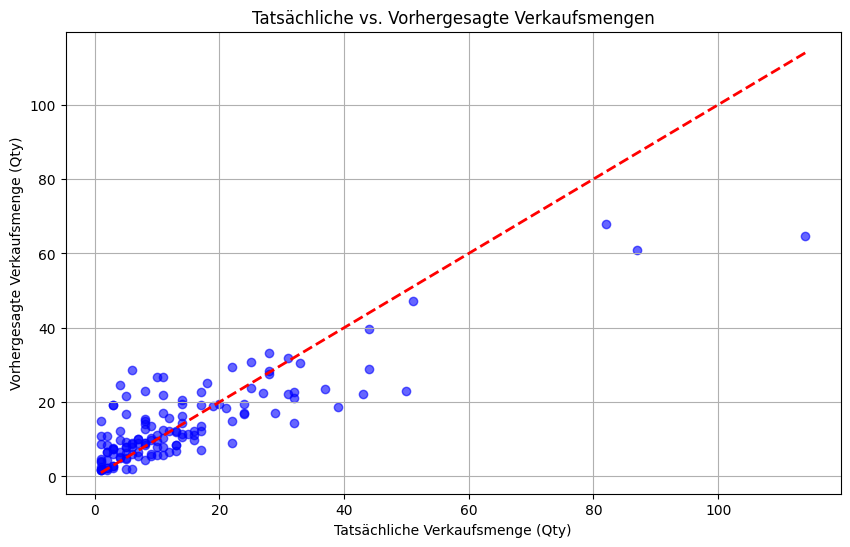

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_tahmin, alpha=0.6, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel('Tatsächliche Verkaufsmenge (Qty)')
plt.ylabel('Vorhergesagte Verkaufsmenge (Qty)')
plt.title('Tatsächliche vs. Vorhergesagte Verkaufsmengen')

plt.grid(True)
plt.savefig('vorhersage_vs_tatsaechlich.png')
plt.show()

In [28]:
import joblib
joblib.dump(rfModel,'model.pkl')

['model.pkl']

In [29]:
from sklearn.preprocessing import LabelEncoder
f=pd.read_csv('Testdatensatz.csv')
le = LabelEncoder()
le.fit(f['product_category_name'])
joblib.dump(le,'le.pkl')


['le.pkl']

In [30]:
import joblib
import pandas as pd
df=pd.read_csv(r'Test.csv')
model=joblib.load('model.pkl')
kodlayici=joblib.load('le.pkl')
girdi_sutunlari={
    'product_category_name':None,
    'unit_price':None,
    'freight_price':None ,
    'product_score':None ,
    'customers':None ,
    'product_description_lenght':None,
    'product_name_lenght':None,
    'product_photos_qty': None,
    'product_weight_g':None ,
    'product_score':None ,
    'customers': None,
    'weekday': None,
    'weekend': None,
    'holiday':None ,
    'month': None,
    'year': None,
    's':None ,
    'volume': None,
    'comp_1':None , 'ps1':None , 'fp1':None ,
    'comp_2': None, 'ps2': None, 'fp2':None ,
    'comp_3':None , 'ps3': None, 'fp3':None ,
    'lag_price':None
}
for index, row in df.iterrows():
    test_eslesme=girdi_sutunlari.copy()
    csv_satir = row.to_dict()
    test_eslesme.update(csv_satir)

tahmin=pd.DataFrame([test_eslesme])

tahmin['product_category_name']=kodlayici.transform(tahmin['product_category_name'])
tahmin = tahmin[model.feature_names_in_]

sonuc=model.predict(tahmin)[0]

print("monatlicher Verkaufsbetrag: ", sonuc)


monatlicher Verkaufsbetrag:  8.9
